## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 27.02.2024
- remaining points: last lab session before or on Tuesday, 05.03.2023

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and asnwers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure `torch`.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [1]:
import matplotlib.pyplot as plt
import torch

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

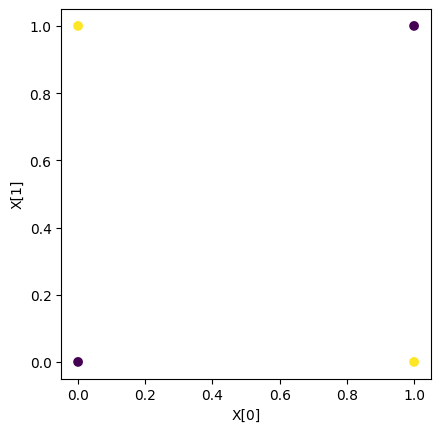

In [2]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=torch.float64)
# Y is a matrix of N numners - answers
Y = torch.tensor([[0], [1], [1], [0],], dtype=torch.float64)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [3]:
def sigmoid(x):
    return 1.0 / (1.0 + torch.exp(-x))

class SmallNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float64):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)

        self.init_params()

    def init_params(self):
        # set all parameters to small random values, e.g. from N(0, 0.5)
        torch.nn.init.normal_(self.W1, 0, 0.5)
        torch.nn.init.normal_(self.b1, 0, 0.5)
        torch.nn.init.normal_(self.W2, 0, 0.5)
        torch.nn.init.normal_(self.b2, 0, 0.5)

    def forward(self, X, Y=None, do_backward=False):
        #print(f"X:{X}, Y:{Y}, W1.T:{self.W1.T}, b1:{self.b1}, W2.T:{self.W2.T}, b2:{self.b2}")

        # Input to neurons in 1st layer
        A1 = X @ self.W1.T + self.b1

        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)

        #print(f"A1:{A1}, O1:{O1}")

        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.T + self.b2

        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        #print(f"A2:{A2}, O2:{O2}")

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -Y * torch.log(O2) - (1.0 - Y) * torch.log(1.0 - O2) # cross-entropy loss
            # normalize loss by batch size
            #print(f"loss:{loss}")
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            A2_grad = (O2 - Y) / X.shape[0]
            #print(f"O2:{O2}, \nY:{Y}")
            #print(f"a2grad:{A2_grad}, \nO1:{O1}, \nW2:{self.W2}\n")
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            #print(f"w2grad:{self.W2_grad}, O1.T@A2_grad ).T:{(O1.T@A2_grad ).T}")

            #O1_grad = - (Y/O1) + (1 - Y)/(1 - O1)
            #A1_grad = O1 - Y
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * (1 - O1) * O1

            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O2, loss

In [4]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=torch.float64)
net.W1 = torch.tensor([[1, 1],[-1, -1]], dtype=torch.float64) * 1000
net.b1 = torch.tensor([-0.5, 1.5], dtype=torch.float64) * 1000
net.W2 = torch.tensor([1, 1], dtype=torch.float64) * 1000
net.b2 = torch.tensor([-1.5], dtype=torch.float64) * 1000

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large

predictions, loss = net.forward(X, Y, do_backward=False)
print(X, predictions, loss)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p}")

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]], dtype=torch.float64) tensor([7.1246e-218,  1.0000e+00,  1.0000e+00, 7.1246e-218],
       dtype=torch.float64) tensor(nan, dtype=torch.float64)
XORnet(tensor([0., 0.], dtype=torch.float64)) = 7.124576406741285e-218
XORnet(tensor([0., 1.], dtype=torch.float64)) = 1.0
XORnet(tensor([1., 0.], dtype=torch.float64)) = 1.0
XORnet(tensor([1., 1.], dtype=torch.float64)) = 7.124576406741285e-218


/tmp/ipykernel_6209/3564111960.py:32: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3675.)
  A2 = O1 @ self.W2.T + self.b2


## Problem 2

In [5]:
def check_grad(net, param_name, X, Y, eps=1e-5):

    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = torch.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i].item()
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)

    print(f"param: {param_name} grad:{grad}, origgrad:{orig_grad}")
    assert torch.allclose(grad, orig_grad)
    return grad, orig_grad


In [6]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=torch.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

param: W1 grad:tensor([[-0.0059, -0.0093],
        [ 0.0047,  0.0036]], dtype=torch.float64), origgrad:tensor([[-0.0059, -0.0093],
        [ 0.0047,  0.0036]], dtype=torch.float64)
param: b1 grad:tensor([-0.0121,  0.0081], dtype=torch.float64), origgrad:tensor([-0.0121,  0.0081], dtype=torch.float64)
param: W2 grad:tensor([[-0.0515, -0.0757]], dtype=torch.float64), origgrad:tensor([[-0.0515, -0.0757]], dtype=torch.float64)
param: b2 grad:tensor([-0.1424], dtype=torch.float64), origgrad:tensor([-0.1424], dtype=torch.float64)


## Problem 3

In [7]:
net = SmallNet(2, 10, dtype=torch.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        #print(f"param: {param}")
        param[:] = param[:] - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.7462357836015503
after 5000 steps 	loss=0.027442663394993017
after 10000 steps 	loss=0.009414873896172718
after 15000 steps 	loss=0.005446743276715779
after 20000 steps 	loss=0.003765765663174518
after 25000 steps 	loss=0.00284996105278325
after 30000 steps 	loss=0.0022782805280825756
after 35000 steps 	loss=0.0018894428955133964
after 40000 steps 	loss=0.0016088453088195476
after 45000 steps 	loss=0.001397390378081643
after 50000 steps 	loss=0.0012326747027560994
after 55000 steps 	loss=0.0011009681248613963
after 60000 steps 	loss=0.000993402079009688
after 65000 steps 	loss=0.0009040010833570566
after 70000 steps 	loss=0.0008285967416441166
after 75000 steps 	loss=0.0007641955276166403
after 80000 steps 	loss=0.000708593924598132
after 85000 steps 	loss=0.0006601351293226813
after 90000 steps 	loss=0.000617550193287177
after 95000 steps 	loss=0.0005798513492136121


In [8]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.0004110284911761391
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.9994436437454616
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.9994494092044136
XORnet(tensor([1., 1.], dtype=torch.float64)) = 0.000666445740085386


In [9]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.

X3 = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1],], dtype=torch.float64)
Y3 = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1],], dtype=torch.float64)

for hidden_dim in [2, 3, 5, 10, 20]:
    # run a few trainings and record the fraction of successful ones
    net = SmallNet(3, hidden_dim, dtype=torch.float64)

    alpha = 0.1  # set a learning rate

    print(f"run for {hidden_dim} hidden")
    for i in range(100000):
        _, loss = net.forward(X3, Y3, do_backward=True)
        if (i % 5000) == 0:
            print(f"after {i} steps \tloss={loss}")
        for param_name in ["W1", "b1", "W2", "b2"]:
            param = getattr(net, param_name)
            param[:] = param[:] - alpha * getattr(net, param_name + "_grad")
        
    predictions, _ = net.forward(X3, Y3, do_backward=False)
    epsilon = 0.01
    success = 0
    for i in range(Y3.shape[0]):
        print(f"X3: {X3[i]}, Y3: {Y3[i]}, prediction: {predictions[i]}")
        if abs(predictions[i] - Y3[i]) < epsilon:
            success += 1

    print(f"for {hidden_dim} hidden neurons success rate is: {success / Y3.shape[0]}")
    

run for 2 hidden
after 0 steps 	loss=0.6998536731123869
after 5000 steps 	loss=0.6927375886853283
after 10000 steps 	loss=0.6308109626674524
after 15000 steps 	loss=0.38034628836278117
after 20000 steps 	loss=0.36022404969547867
after 25000 steps 	loss=0.3548977643419758
after 30000 steps 	loss=0.3525074849254562
after 35000 steps 	loss=0.35116353438345393
after 40000 steps 	loss=0.35030644055096166
after 45000 steps 	loss=0.3497139198291881
after 50000 steps 	loss=0.34928065504653555
after 55000 steps 	loss=0.3489504759554279
after 60000 steps 	loss=0.34869075162660157
after 65000 steps 	loss=0.3484812577073723
after 70000 steps 	loss=0.3483088057255846
after 75000 steps 	loss=0.3481644354766344
after 80000 steps 	loss=0.3480418502748094
after 85000 steps 	loss=0.34793649805654214
after 90000 steps 	loss=0.3478450077215961
after 95000 steps 	loss=0.34776483038294487
X3: tensor([0., 0., 0.], dtype=torch.float64), Y3: tensor([0.], dtype=torch.float64), prediction: tensor([0.0011], dtype

## Problem 4


In [10]:
def ReLU(x):
    return torch.maximum(x, torch.zeros(x.shape))

def ReLUderivative(x):
    return torch.gt(x, 0.0).double()

class ReluNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float64):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)

        self.init_params()

    def init_params(self):
        # set all parameters to small random values, e.g. from N(0, 0.5)
        torch.nn.init.normal_(self.W1, 0, 0.5)
        torch.nn.init.normal_(self.b1, 0, 0.5)
        torch.nn.init.normal_(self.W2, 0, 0.5)
        torch.nn.init.normal_(self.b2, 0, 0.5)

    def forward(self, X, Y=None, do_backward=False):
        #print(f"X:{X}, Y:{Y}, W1.T:{self.W1.T}, b1:{self.b1}, W2.T:{self.W2.T}, b2:{self.b2}")

        A1 = X @ self.W1.T + self.b1
        O1 = ReLU(A1)

        #print(f"A1:{A1}, O1:{O1}")

        A2 = O1 @ self.W2.T + self.b2
        O2 = ReLU(A2)

        #print(f"A2:{A2}, O2:{O2}")

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -Y * torch.log(O2) - (1.0 - Y) * torch.log(1.0 - O2) # cross-entropy loss
            # normalize loss by batch size
            #print(f"loss:{loss}")
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A2_grad = (O2 - Y) / X.shape[0]
            #print(f"O2:{O2}, \nY:{Y}")
            #print(f"a2grad:{A2_grad}, \nO1:{O1}, \nW2:{self.W2}\n")
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            #print(f"w2grad:{self.W2_grad}, O1.T@A2_grad ).T:{(O1.T@A2_grad ).T}")

            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * ReLUderivative(A1)

            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O2, loss

In [11]:
for hidden_dim in [10]:
    # run a few trainings and record the fraction of successful ones
    net = ReluNet(3, hidden_dim, dtype=torch.float64)

    alpha = 0.1  # set a learning rate

    print(f"run for {hidden_dim} hidden")
    for i in range(100000):
        _, loss = net.forward(X3, Y3, do_backward=True)
        if (i % 5000) == 0:
            print(f"after {i} steps \tloss={loss}")
        for param_name in ["W1", "b1", "W2", "b2"]:
            param = getattr(net, param_name)
            param[:] = param[:] - alpha * getattr(net, param_name + "_grad")
        
    predictions, _ = net.forward(X3, Y3, do_backward=False)
    epsilon = 0.01
    success = 0
    for i in range(Y3.shape[0]):
        print(f"X3: {X3[i]}, Y3: {Y3[i]}, prediction: {predictions[i]}")
        if abs(predictions[i] - Y3[i]) < epsilon:
            success += 1

    print(f"for {hidden_dim} hidden neurons success rate is: {success / Y3.shape[0]}")

run for 10 hidden
after 0 steps 	loss=nan
after 5000 steps 	loss=1.4696155284189557e-08
after 10000 steps 	loss=3.5388358909926975e-15
after 15000 steps 	loss=3.5388358909926975e-15
after 20000 steps 	loss=3.5388358909926975e-15
after 25000 steps 	loss=3.5388358909926975e-15
after 30000 steps 	loss=3.5388358909926975e-15
after 35000 steps 	loss=3.5388358909926975e-15
after 40000 steps 	loss=3.5388358909926975e-15
after 45000 steps 	loss=3.5388358909926975e-15
after 50000 steps 	loss=3.5388358909926975e-15
after 55000 steps 	loss=3.5388358909926975e-15
after 60000 steps 	loss=3.5388358909926975e-15
after 65000 steps 	loss=3.5388358909926975e-15
after 70000 steps 	loss=3.5388358909926975e-15
after 75000 steps 	loss=3.5388358909926975e-15
after 80000 steps 	loss=3.5388358909926975e-15
after 85000 steps 	loss=3.5388358909926975e-15
after 90000 steps 	loss=3.5388358909926975e-15
after 95000 steps 	loss=3.5388358909926975e-15
X3: tensor([0., 0., 0.], dtype=torch.float64), Y3: tensor([0.], dt

## Problem 5

In [12]:
def sigmoid(x):
    return 1.0 / (1.0 + torch.exp(-x))

class SmallNet3:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float64):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((num_hidden, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((num_hidden,), dtype=dtype)
        self.W3 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b3 = torch.zeros((1,), dtype=dtype)

        self.init_params()

    def init_params(self):
        # set all parameters to small random values, e.g. from N(0, 0.5)
        torch.nn.init.normal_(self.W1, 0, 0.5)
        torch.nn.init.normal_(self.b1, 0, 0.5)
        torch.nn.init.normal_(self.W2, 0, 0.5)
        torch.nn.init.normal_(self.b2, 0, 0.5)
        torch.nn.init.normal_(self.W3, 0, 0.5)
        torch.nn.init.normal_(self.b3, 0, 0.5)

    def forward(self, X, Y=None, do_backward=False):
        #print(f"X:{X}, Y:{Y}, W1.T:{self.W1.T}, b1:{self.b1}, W2.T:{self.W2.T}, b2:{self.b2}")

        A1 = X @ self.W1.T + self.b1
        O1 = sigmoid(A1)

        #print(f"A1:{A1}, O1:{O1}")

        A2 = O1 @ self.W2.T + self.b2
        O2 = sigmoid(A2)

        A3 = O2 @ self.W3.T + self.b3
        O3 = sigmoid(A3)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -Y * torch.log(O3) - (1.0 - Y) * torch.log(1.0 - O3) # cross-entropy loss
            # normalize loss by batch size
            #print(f"loss:{loss}")
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A3_grad = (O3 - Y) / X.shape[0]

            self.b3_grad = A3_grad.sum(0)
            self.W3_grad = A3_grad.T @ O2

            O2_grad = A3_grad @ self.W3
            A2_grad = O2_grad * (1 - O2) * O2

            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1

            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * (1 - O1) * O1

            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O3, loss

In [13]:
net = SmallNet3(3, 3, dtype=torch.float64)

for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
    check_grad(net, param_name, X3, Y3)

param: W1 grad:tensor([[-1.0931e-03, -1.0379e-03, -8.7650e-04],
        [ 2.5483e-05,  2.5664e-05,  3.4214e-05],
        [-6.1097e-04, -7.5635e-04, -5.7819e-04]], dtype=torch.float64), origgrad:tensor([[-1.0931e-03, -1.0379e-03, -8.7650e-04],
        [ 2.5483e-05,  2.5664e-05,  3.4214e-05],
        [-6.1097e-04, -7.5635e-04, -5.7819e-04]], dtype=torch.float64)
param: b1 grad:tensor([-2.0467e-03,  9.0060e-05, -1.2957e-03], dtype=torch.float64), origgrad:tensor([-2.0467e-03,  9.0060e-05, -1.2957e-03], dtype=torch.float64)
param: W2 grad:tensor([[0.0016, 0.0015, 0.0047],
        [0.0017, 0.0016, 0.0047],
        [0.0005, 0.0005, 0.0014]], dtype=torch.float64), origgrad:tensor([[0.0016, 0.0015, 0.0047],
        [0.0017, 0.0016, 0.0047],
        [0.0005, 0.0005, 0.0014]], dtype=torch.float64)
param: b2 grad:tensor([0.0081, 0.0083, 0.0024], dtype=torch.float64), origgrad:tensor([0.0081, 0.0083, 0.0024], dtype=torch.float64)
param: W3 grad:tensor([[0.0147, 0.0205, 0.0342]], dtype=torch.float6

In [14]:
for hidden_dim in [10]:
    # run a few trainings and record the fraction of successful ones
    net = SmallNet3(3, hidden_dim, dtype=torch.float64)

    alpha = 0.1  # set a learning rate

    print(f"run for {hidden_dim} hidden")
    for i in range(120000):
        _, loss = net.forward(X3, Y3, do_backward=True)
        if (i % 30000) == 0:
            print(f"after {i} steps \tloss={loss}")
        for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
            param = getattr(net, param_name)
            param[:] = param[:] - alpha * getattr(net, param_name + "_grad")
        
    predictions, _ = net.forward(X3, Y3, do_backward=False)
    epsilon = 0.01
    success = 0
    print(predictions)
    for i in range(Y3.shape[0]):
        print(f"X3: {X3[i]}, Y3: {Y3[i]}, prediction: {predictions[i]}")
        if abs(predictions[i] - Y3[i]) < epsilon:
            success += 1

    print(f"for {hidden_dim} hidden neurons success rate is: {success / Y3.shape[0]}")

run for 10 hidden
after 0 steps 	loss=0.7744361126186956
after 30000 steps 	loss=0.0008769303294631394
after 60000 steps 	loss=0.0002921399988585113
after 90000 steps 	loss=0.00016823622554747378
tensor([[1.0901e-04],
        [9.9986e-01],
        [9.9988e-01],
        [1.8499e-04],
        [9.9987e-01],
        [8.6538e-05],
        [7.1908e-05],
        [9.9991e-01]], dtype=torch.float64)
X3: tensor([0., 0., 0.], dtype=torch.float64), Y3: tensor([0.], dtype=torch.float64), prediction: tensor([0.0001], dtype=torch.float64)
X3: tensor([0., 0., 1.], dtype=torch.float64), Y3: tensor([1.], dtype=torch.float64), prediction: tensor([0.9999], dtype=torch.float64)
X3: tensor([0., 1., 0.], dtype=torch.float64), Y3: tensor([1.], dtype=torch.float64), prediction: tensor([0.9999], dtype=torch.float64)
X3: tensor([0., 1., 1.], dtype=torch.float64), Y3: tensor([0.], dtype=torch.float64), prediction: tensor([0.0002], dtype=torch.float64)
X3: tensor([1., 0., 0.], dtype=torch.float64), Y3: tensor([1.]

## Problem 6

In [15]:
def sigmoid(x):
    return 1.0 / (1.0 + torch.exp(-x))

class CustomNet:
    def __init__(self, in_features: int, num_hidden: int, num_layers: int, dtype=torch.float64):

        self.Ws = []
        self.bs = []

        self.Ws.append(torch.zeros((num_hidden, in_features), dtype=dtype))
        self.bs.append(torch.zeros((num_hidden,), dtype=dtype))
        
        for i in range(num_layers):
            self.Ws.append(torch.zeros((num_hidden, num_hidden), dtype=dtype))
            self.bs.append(torch.zeros((num_hidden,), dtype=dtype))
        
        self.Ws.append(torch.zeros((1, num_hidden), dtype=dtype))
        self.bs.append(torch.zeros((1,), dtype=dtype))

        self.init_params()

    def init_params(self):
        # set all parameters to small random values, e.g. from N(0, 0.5)
        for i in range( len(self.Ws) ):
            torch.nn.init.normal_(self.Ws[i], 0, 0.5)
            torch.nn.init.normal_(self.bs[i], 0, 0.5)

    def forward(self, X, Y=None, do_backward=False):
        As = []
        Os = []

        layercount = len(self.Ws)

        As.append( X @ self.Ws[0].T + self.bs[0] )
        Os.append( sigmoid(As[0]) )
        for i in range( 1, layercount ):
            As.append( Os[i - 1] @ self.Ws[i].T + self.bs[i] )
            Os.append( sigmoid(As[i]) )

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -Y * torch.log(Os[layercount - 1]) - (1.0 - Y) * torch.log(1.0 - Os[layercount - 1]) # cross-entropy loss
            # normalize loss by batch size
            #print(f"loss:{loss}")
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A_grads = []
            O_grads = []
            self.W_grads = []
            self.b_grads = []

            backiter = layercount - 1

            O_grads.append( 0 )
            A_grads.append( (Os[backiter] - Y) / X.shape[0] )

            backiter -= 1

            for i in range( 0, layercount - 1 ):
                self.b_grads.append(A_grads[i].sum(0))
                self.W_grads.append(A_grads[i].T @ Os[backiter])

                O_grads.append(A_grads[i] @ self.W_grads[i])
                A_grads.append(O_grads[i + 1] * (1 - Os[backiter]) * Os[backiter])

                backiter -= 1

            self.b_grads.append(A_grads[layercount - 1].sum(0))
            self.W_grads.append(A_grads[layercount - 1].T @ X)

            self.W_grads = self.W_grads[::-1]
            self.b_grads = self.b_grads[::-1]

        return Os[layercount - 1], loss

In [16]:
for hidden_dim in [10]:
    # run a few trainings and record the fraction of successful ones
    net = CustomNet(3, hidden_dim, 2, dtype=torch.float64)

    alpha = 0.1  # set a learning rate

    print(f"run for {hidden_dim} hidden")
    for i in range(120000):
        _, loss = net.forward(X3, Y3, do_backward=True)
        if (i % 30000) == 0:
            print(f"after {i} steps \tloss={loss}")

        Ws = getattr(net, "Ws")
        bs = getattr(net, "bs")
        W_grads = getattr(net, "W_grads")
        b_grads = getattr(net, "b_grads")

        #print(f"Ws: {Ws},\n bs: {bs},\n W_grads: {W_grads},\n b_grads: {b_grads} \n")

        for i in range( 0, len(Ws) ):
            Ws[i][:] = Ws[i][:] - alpha * W_grads[i]
            bs[i][:] = bs[i][:] - alpha * b_grads[i]
        
    predictions, _ = net.forward(X3, Y3, do_backward=False)
    epsilon = 0.01
    success = 0
    for i in range(Y3.shape[0]):
        print(f"X3: {X3[i]}, Y3: {Y3[i]}, prediction: {predictions[i]}")
        if abs(predictions[i] - Y3[i]) < epsilon:
            success += 1

    print(f"for {hidden_dim} hidden neurons success rate is: {success / Y3.shape[0]}")

run for 10 hidden
after 0 steps 	loss=0.7619917760375082
after 30000 steps 	loss=0.6931426385875296
after 60000 steps 	loss=0.6930848863996129
after 90000 steps 	loss=0.6930320208998166
X3: tensor([0., 0., 0.], dtype=torch.float64), Y3: tensor([0.], dtype=torch.float64), prediction: tensor([0.4976], dtype=torch.float64)
X3: tensor([0., 0., 1.], dtype=torch.float64), Y3: tensor([1.], dtype=torch.float64), prediction: tensor([0.4964], dtype=torch.float64)
X3: tensor([0., 1., 0.], dtype=torch.float64), Y3: tensor([1.], dtype=torch.float64), prediction: tensor([0.5001], dtype=torch.float64)
X3: tensor([0., 1., 1.], dtype=torch.float64), Y3: tensor([0.], dtype=torch.float64), prediction: tensor([0.4980], dtype=torch.float64)
X3: tensor([1., 0., 0.], dtype=torch.float64), Y3: tensor([1.], dtype=torch.float64), prediction: tensor([0.5018], dtype=torch.float64)
X3: tensor([1., 0., 1.], dtype=torch.float64), Y3: tensor([0.], dtype=torch.float64), prediction: tensor([0.5000], dtype=torch.float64

## Problem 7